EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Catalina Aránguiz`
  - `# Maykol Medrano`
- Usuario de GitHub (opcional):  `# MaykolMedrano # caranguizc`

`[Repo Github]: https://github.com/MaykolMedrano/AMLE`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


In [ ]:
#Librerias

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline




## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [ ]:
# Cargar dataset desde UCI
bank = fetch_ucirepo(id=222)

# Separar features y target
X = bank.data.features
y = bank.data.targets

# Concatenar X e y en un único DataFrame consolidado
df = pd.concat([X, y], axis=1)

# Mostrar las primeras 5 observaciones (vista limpia)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [ ]:
# Filtrar columnas tipo object o category con solo 2 valores únicos
binarias_categoricas = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if df[col].nunique() == 2
]

print("Variables binarias categóricas:", binarias_categoricas)

Variables binarias categóricas: ['default', 'housing', 'loan', 'contact', 'y']


In [ ]:
for col in binarias_categoricas:

    df[col] = df[col].map({'yes': 1, 'no': 0})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [ ]:
# Tipo de dato de cada columna
df.dtypes.to_frame(name='Tipo de Dato')

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas: Variables numéricas")
df.select_dtypes(include='number').describe()


Estadísticas descriptivas: Variables numéricas


,age,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,0.0,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,NaN,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
# Estadísticas descriptivas para variables no numéricas (object/category)
print("\nEstadísticas descriptivas: Variables categóricas/object")
df.select_dtypes(exclude='number').describe()


Estadísticas descriptivas: Variables categóricas/object


,job,marital,education,month,poutcome
count,44923,45211,43354,45211,8252
unique,11,3,3,12,3
top,blue-collar,married,secondary,may,failure
freq,9732,27214,23202,13766,4901


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

<Axes: >

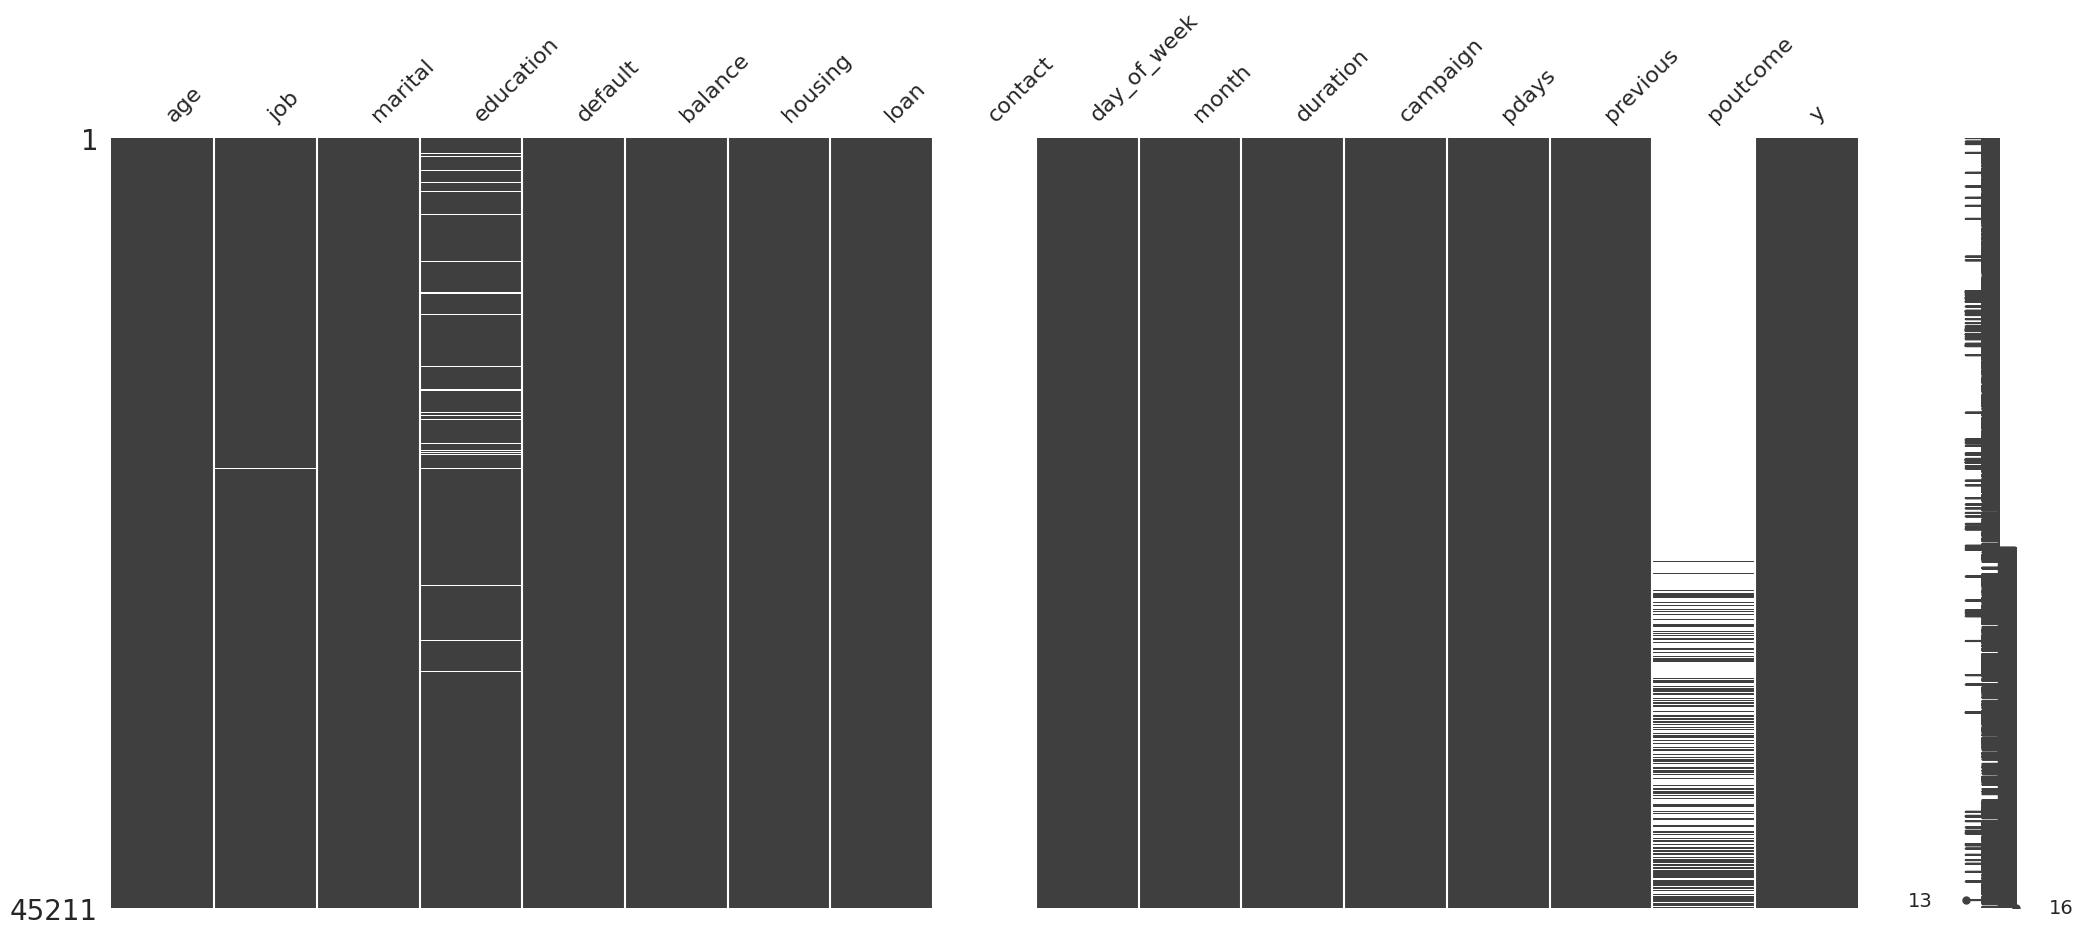

In [ ]:

import missingno as msno
msno.matrix(df)

In [ ]:
#Identificar columnas con valores nulos (missing values)

# Creamos un DataFrame con el conteo de missing values
missing_df = df.isnull().sum().to_frame(name='Missing_Values')

# Filtramos solo aquellas columnas que tienen valores nulos
missing_df = missing_df[missing_df.Missing_Values > 0]

# Mostramos visualmente el resultado
missing_df

,Missing_Values
job,288
education,1857
contact,45211
poutcome,36959


<ipython-input-79-b9cc89cad090>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-79-b9cc89cad090>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-79-b9cc89cad090>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-79-b9cc89cad090>:10: UserWarning: Ignoring `palette` because no `hu

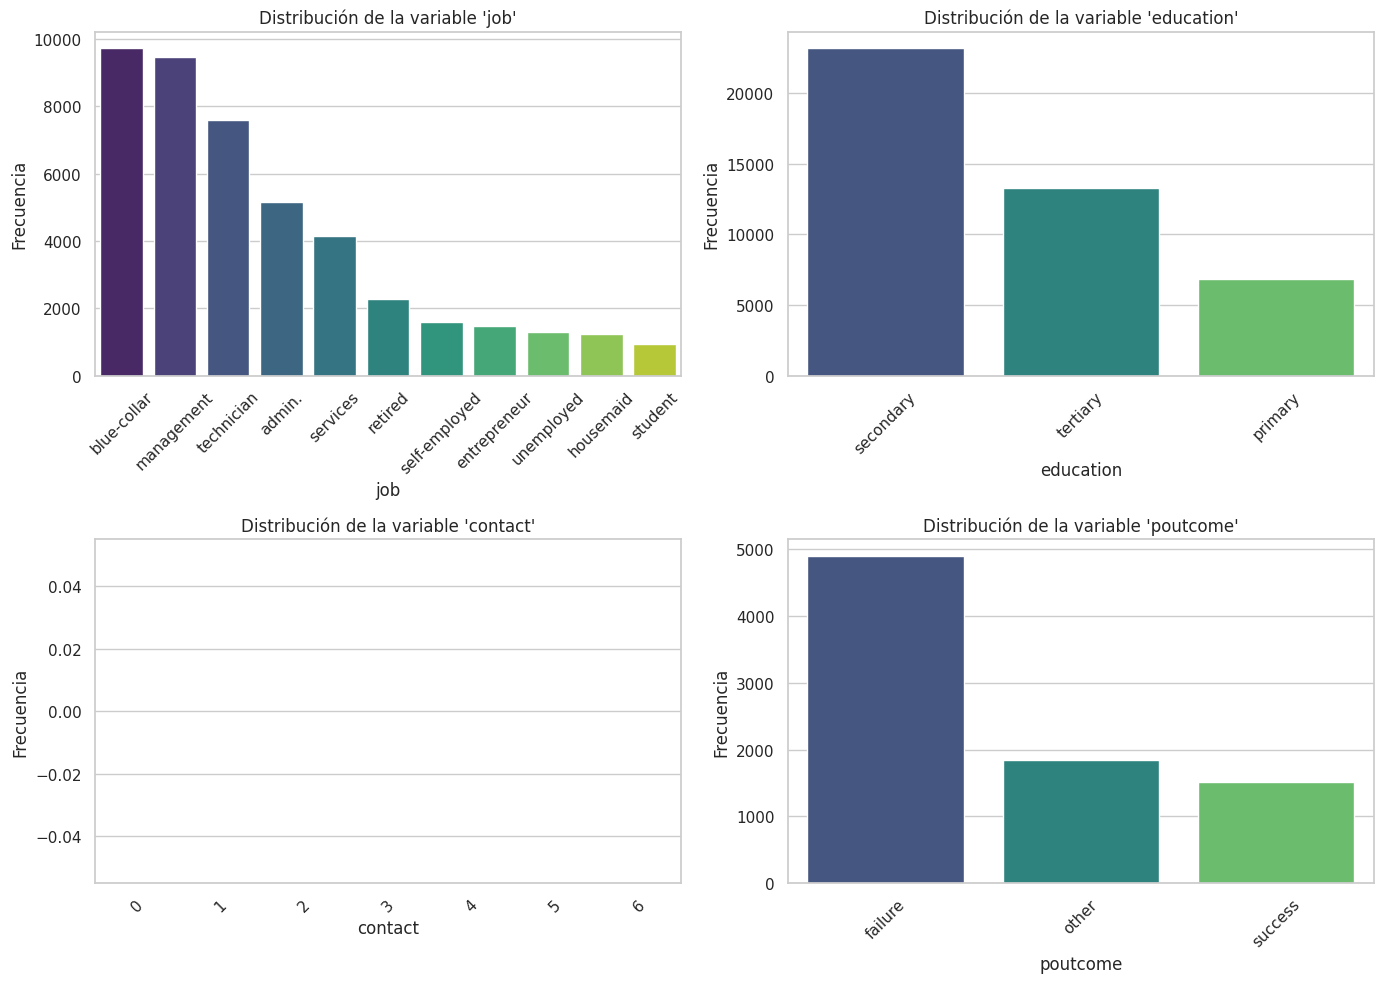

In [ ]:
# Lista de variables con valores faltantes
cols = ['job', 'education', 'contact', 'poutcome']

# Ajustar el tamaño de las figuras
plt.figure(figsize=(14, 10))

# Graficar la distribución de cada variable categórica
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de la variable '{col}'")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
# Imputar valores

# 1. job → moda
job_mode = df['job'].mode()[0]
df['job'] = df['job'].fillna(job_mode)

# 2. education → moda
edu_mode = df['education'].mode()[0]
df['education'] = df['education'].fillna(edu_mode)

# 3. contact → "eliminar, no hay ningun número"
# 4. poutcome → "eliminar"
df.drop(['contact', 'poutcome'], axis=1, inplace=True)

# Verificamos que no queden missing values
df.isnull().sum().to_frame(name="Missing_Values").query("Missing_Values > 0")

,Missing_Values


<ipython-input-82-dda31a2e066d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-82-dda31a2e066d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


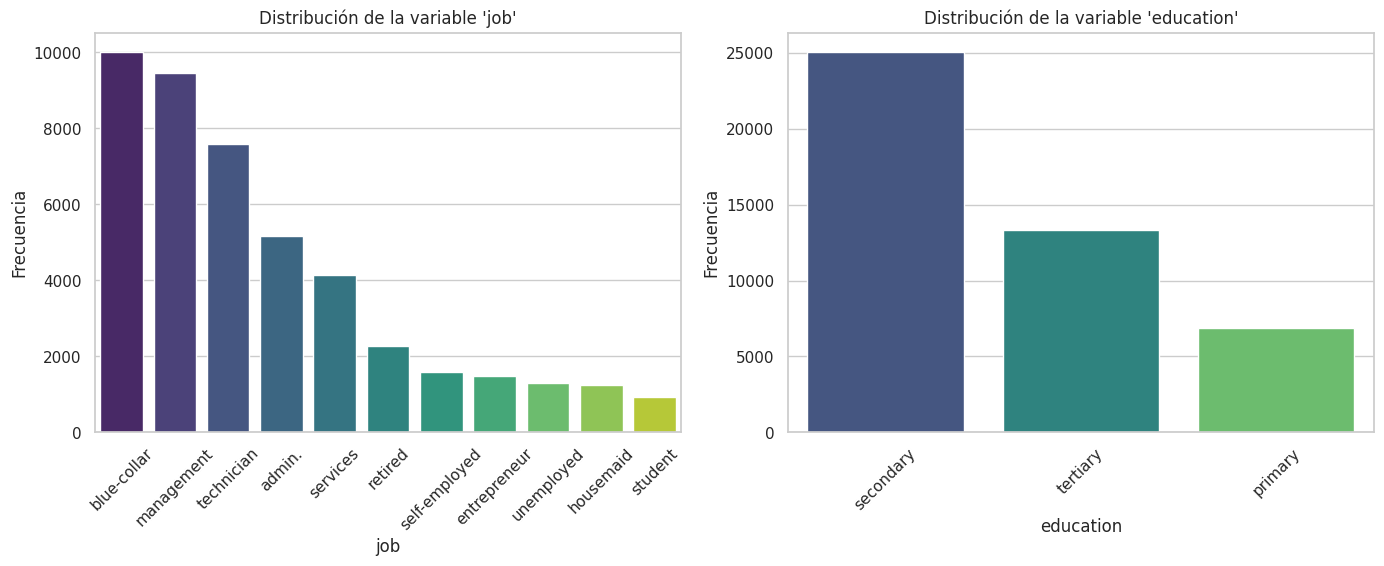

In [ ]:
# Lista de variables con valores faltantes
cols = ['job', 'education']

# Ajustar el tamaño de las figuras
plt.figure(figsize=(14, 10))

# Graficar la distribución de cada variable categórica
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de la variable '{col}'")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()




---


El análisis inicial del conjunto de datos reveló la presencia de valores faltantes en cuatro variables: job, education, contact y poutcome. La identificación se realizó mediante inspección visual con la librería missingno y un conteo sistemático de valores nulos. Esta etapa es esencial, ya que la forma en que se manejan los datos ausentes puede tener un impacto significativo sobre el rendimiento y la validez de los modelos predictivos posteriores.

En primer lugar, la variable job —que representa el tipo de ocupación del cliente— presentó 288 valores faltantes. Esta variable es de tipo categórico nominal, es decir, sus categorías no presentan un orden natural, pero sí ofrecen información potencialmente relevante sobre la situación socioeconómica del individuo. Dado que la proporción de valores ausentes es relativamente baja y que la distribución de la variable no es uniforme, se optó por imputar los valores faltantes utilizando la moda. Esta elección se justifica en que, para variables categóricas nominales con baja proporción de datos faltantes, imputar con el valor más frecuente permite preservar la estructura general sin introducir una distorsión significativa en la distribución. Además, el hecho de que la ocupación más común sea ‘admin.’ refuerza la validez de esta estrategia, pues es razonable asumir que un grupo representativo de individuos podría compartir dicha categoría.

La variable education —relativa al nivel educativo alcanzado por el cliente— presentó una cantidad más significativa de valores faltantes (1857). A diferencia de job, esta variable es categórica ordinal, es decir, sus categorías implican un orden lógico (por ejemplo, ‘primary’ < ‘secondary’ < ‘tertiary’). En este caso, aunque una imputación basada en técnicas más complejas, como árboles de decisión o modelos de regresión, podría ser considerada, se optó por una estrategia más conservadora: la imputación mediante la moda. Esta decisión se fundamenta en dos criterios. Por un lado, se busca evitar la introducción de ruido modelando con predictores que podrían estar correlacionados con la educación y, por otro, se reconoce que el valor más frecuente (‘secondary’) ya representa una fracción significativa de la muestra. Imputar con la moda en este contexto respeta la distribución observada y minimiza el sesgo potencial sin suponer un orden implícito no observado en los datos faltantes.


El caso de la variable contact es estructuralmente distinto. Esta variable describe el medio de contacto utilizado para comunicarse con el cliente durante la campaña (por ejemplo, teléfono fijo o celular), y presenta una cantidad de valores faltantes equivalente a la totalidad del conjunto de datos. En términos prácticos, esto significa que la variable no aporta información útil para el análisis: carece completamente de observaciones válidas. Se decidió eliminarla del conjunto de datos, lo que se alinea con buenas prácticas en el tratamiento de variables sin información observable.

Por último, la variable poutcome —que describe el resultado de campañas de marketing previas para cada cliente— también exhibe una proporción sustancial de datos faltantes, con más del 80% de observaciones incompletas. Si bien su contenido puede resultar relevante desde el punto de vista predictivo (clientes expuestos a campañas exitosas podrían tener mayor probabilidad de suscribirse a un producto financiero), la magnitud del faltante hace inviable su imputación sin introducir un nivel significativo de especulación. Cualquier método imputacional, ya sea por modelos supervisados o por distribución marginal, implicaría atribuir valores a una mayoría de observaciones basados en una minoría, lo que socavaría la validez del análisis. Por esta razón, y dado que su inclusión no puede garantizar una mejora sustantiva en los modelos, se optó también por su eliminación.

En conclusión, el tratamiento de los valores faltantes se realizó con criterios diferenciados y ajustados a la naturaleza de cada variable. Se imputaron mediante la moda aquellas variables con proporciones de faltantes bajas y tipología categórica (job y education), mientras que se eliminaron aquellas cuya ausencia de datos era total (contact) o mayoritaria (poutcome). Esta estrategia equilibrada busca preservar la integridad informativa del dataset sin comprometer la robustez de los modelos que serán entrenados posteriormente.

---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

Columnas categóricas para graficar: ['job', 'marital', 'education', 'month']


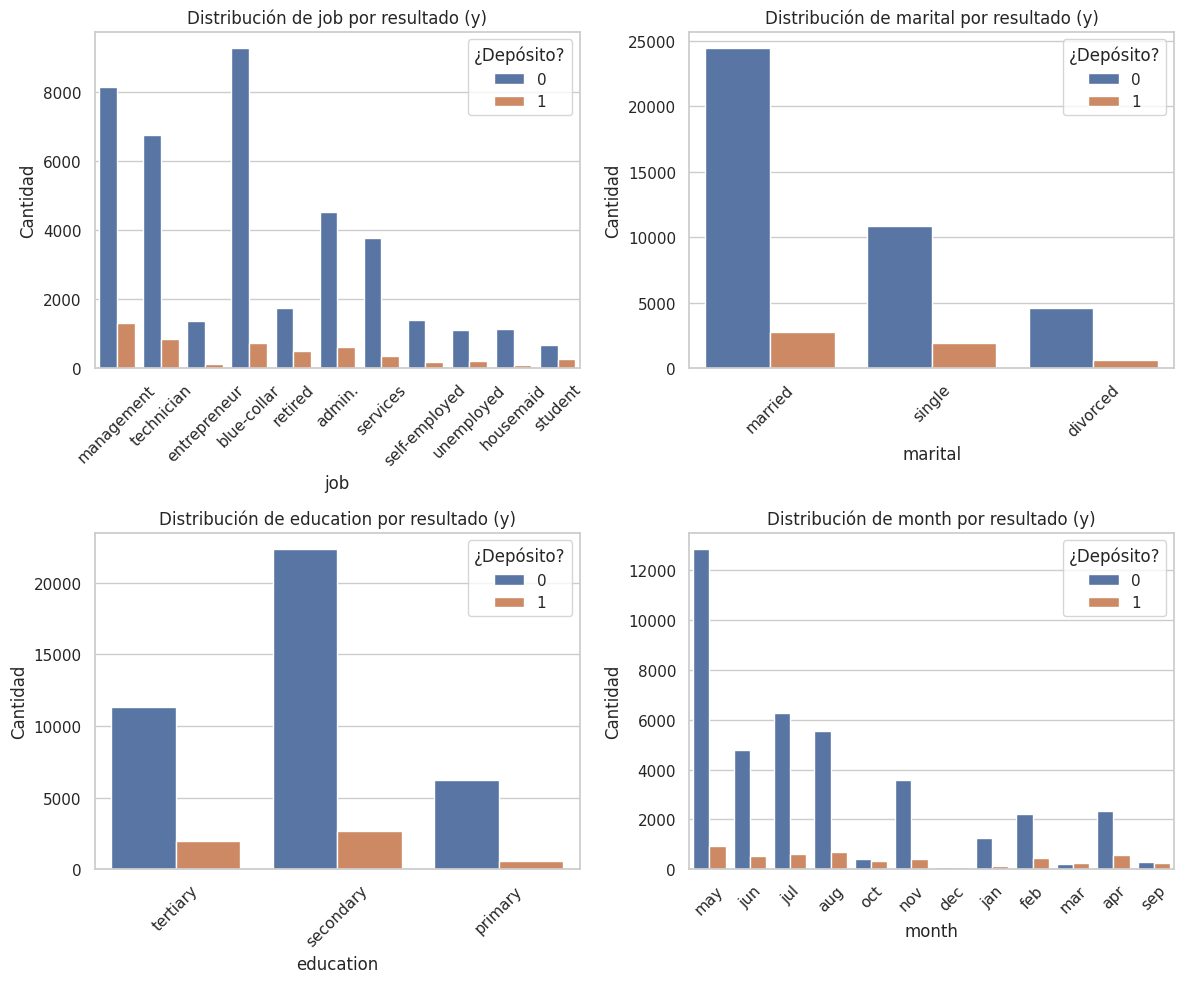

In [ ]:
# Aumentar tamaño base de los gráficos
sns.set(style="whitegrid")
# Ajustar el tamaño de la figura para acomodar 4 subplots
plt.rcParams['figure.figsize'] = (12, 10)

# Filtrar solo las columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include='object').columns.tolist() # Convert to list

# Excluimos la variable objetivo 'y' si está presente
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print("Columnas categóricas para graficar:", categorical_cols)

# Determinar el número de filas y columnas para la cuadrícula
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size based on number of rows and cols

# Asegurarse de que 'axes' sea un array 2D incluso si hay solo una fila o columna
if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)


# Iterar a través de las columnas categóricas y los subplots
for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    sns.countplot(data=df, x=col, hue='y', ax=ax)
    ax.set_title(f'Distribución de {col} por resultado (y)')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel("Cantidad")
    # Ensure the legend labels match the actual values in 'y'
    ax.legend(title='¿Depósito?', labels=df['y'].unique())

# Ocultar subplots vacíos si hay alguno
for i in range(len(categorical_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout() # Ajusta automáticamente los subplots para que no se solapen
plt.show()




---

Con base en los histogramas generados para las variables categóricas job, marital, education y month, desagregados por la variable objetivo y (indica si el cliente realizó un depósito), es posible interpretar ciertas relaciones significativas entre las categorías y la probabilidad de suscripción.

La variable job (tipo de empleo) se observa una fuerte heterogeneidad en la distribución de depósitos entre las distintas ocupaciones. Profesiones como management, technician y admin, concentran una mayor proporción absoluta de individuos que realizan depósitos, mientras que ocupaciones como blue-collar, services o housemaid tienen tasas visiblemente menores. Este patrón puede ser interpretado como reflejo del capital humano y nivel de ingresos asociado al tipo de empleo, lo cual influye directamente en la propensión a ahorrar mediante depósitos a plazo. Por tanto, job es una variable altamente informativa respecto de la decisión financiera del cliente y debería ser considerada fundamental en modelos predictivos.

En el caso de maritial (estado civil) el análisis muestra que, si bien la mayoría de los clientes están casados (married), esta categoría presenta una menor proporción de depósitos en comparación con personas solteras (single). Esta diferencia podría estar relacionada con la estructura del hogar y las restricciones presupuestarias que enfrentan los hogares casados, lo que podría limitar su capacidad de ahorro. En cambio, individuos solteros pueden tener mayor flexibilidad económica. En consecuencia, aunque la variable marital podría tener un efecto moderado, su inclusión resulta razonable por su posible interacción con otras variables sociodemográficas.

Respecto a la variable education (nivel educacional) se aprecia una tendencia clara a medida que aumenta el nivel educacional (de primary a tertiary), también aumenta la proporción de clientes que realizan depósitos. Esto es coherente con la literatura en economía financiera, que asocia mayor nivel educacional con un mayor grado de alfabetización financiera, mayor acceso a información y una actitud más favorable hacia el ahorro formal. Por lo tanto, education no solo es relevante desde una perspectiva estadística, sino también desde una interpretación económica fundamentada.

En cuanto a la variable month (mes de contacto) muestra un patrón temporal evidente. En los meses de mayo (may) y junio (jun), el volumen de contactos es significativamente más alto, pero la proporción de depósitos parece menor en comparación con meses como mar, dec o oct. Este patrón sugiere que el momento del año en que se contacta a los clientes puede incidir en su disposición a comprometer recursos en productos financieros. Es posible que factores estacionales o campañas promocionales específicas incidan sobre este comportamiento. Esta variable es particularmente útil para modelar dinámicas temporales y capturar efectos estacionales en la propensión a depositar.

Entre las variables categóricas analizadas, job y education parecen ser las más relevantes para predecir si un cliente realizará un depósito, dado que muestran patrones diferenciados claros en la distribución de la variable objetivo. La variable month, aunque no refleja una relación directa con el perfil socioeconómico del cliente, capta efectos estacionales importantes, y su inclusión puede mejorar el desempeño de modelos al capturar estas variaciones temporales. Por su parte, marital ofrece información complementaria que podría contribuir marginalmente al desempeño predictivo, especialmente en interacción con otras variables.


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

Continuous numerical columns for plotting: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


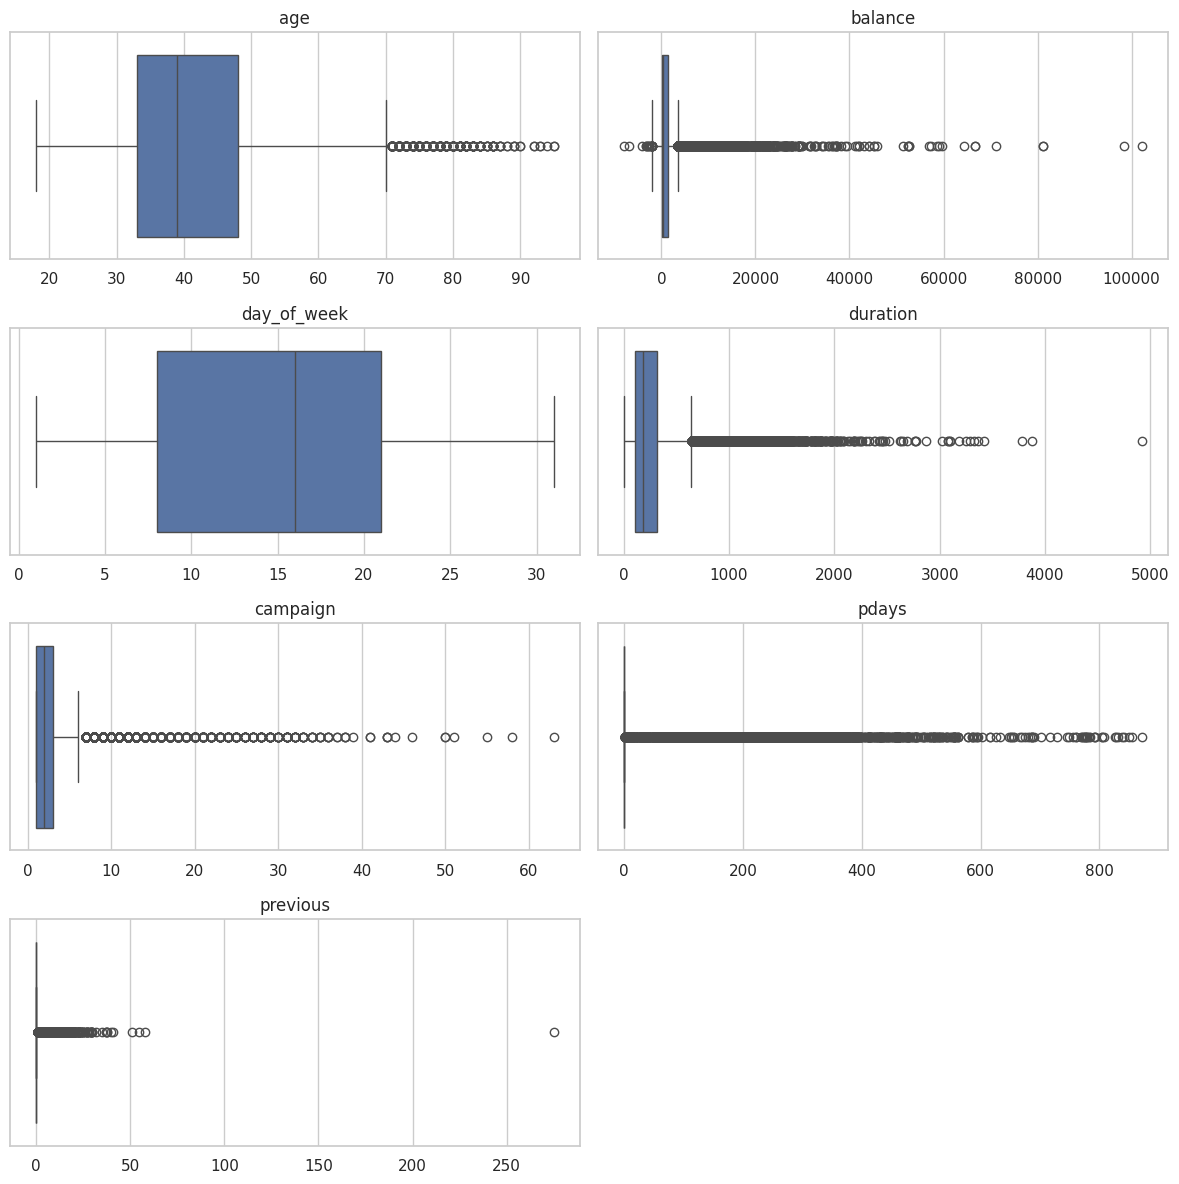

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
binary_or_categorical_as_numbers = ['default', 'housing', 'loan', 'y']
all_num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_num_cols = [col for col in all_num_cols if col not in binary_or_categorical_as_numbers]

print("Continuous numerical columns for plotting:", continuous_num_cols)

# Determine the number of columns and rows for the subplot grid
n_cols = 2
n_rows = math.ceil(len(continuous_num_cols) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))

if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the continuous numerical columns and the subplots
for i, col in enumerate(continuous_num_cols):
    ax = axes[i]

    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')

# Hide any unused subplots if the number of columns isn't a multiple of n_cols
for i in range(len(continuous_num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

La variable **age** representa la edad de los clientes y se observa una distribución concentrada entre los 25 y 60 años, con una cola derecha que se extiende hacia edades mayores (hasta cerca de 95 años). Aunque algunos valores son detectados como outliers por el criterio estadístico, no deberían ser tratados como valores anómalos necesariamente, ya que es razonable que clientes de mayor edad también sean parte del universo bancario. Por tanto, estos valores se consideran válidos y no se imputan.

La variable **balance** representa el saldo promedio de los clientes en euros. Presenta una gran dispersión, con valores que alcanzan los 100,000 euros, y una mediana cercana a cero. La fuerte asimetría indica la existencia de clientes con patrimonios muy elevados, lo cual es realista y esperable en la industria financiera. Dado que estos valores reflejan diferencias socioeconómicas reales, no se recomienda su imputación, sino mantenerlos como parte de la variabilidad natural del fenómeno observado.

en cambio, **duration** si tiene muchos outliers, esta mide la duración en segundos de la última llamada telefónica que el banco hizo al cliente para ofrecerle el producto financiero, si bien esta duración esta disponible, no es una consecuencia del contacto comercial, deberiamos quitar esta variable, un buen modelo debe basarse solo en variables disponibles antes de saber el resultado, como características sociodemográficas, historial financiero, o comportamiento previo.

La variable **campaign** refleja la cantidad de contactos realizados durante la campaña en curso. Se observan valores muy altos (superiores a 50), lo que puede indicar casos de insistencia poco común por parte del banco. Estos valores extremos pueden distorsionar el entrenamiento del modelo, pues es poco probable que individuos contactados más de 50 veces representen comportamientos generales. En este caso, se justifica una imputación suave, como winsorización.

**pdays** indica los días desde el último contacto en una campaña anterior, siendo -1 el valor que representa que el cliente nunca fue contactado antes. Esta codificación implica que la variable ya tiene un valor especial para "sin contacto previo", por lo que el resto de los valores, aunque pueden parecer altos, son válidos dentro del diseño del banco. No se recomienda imputación, pero sí se sugiere transformar la variable a una categórica.

Por último la variable previous muestra la cantidad de contactos realizados en campañas anteriores. Tiene un valor extremo que podemos eliminar y luego aplicar una winsorización (suavizamiento) a los datos.

In [ ]:
#Eliminamos un outlier muy evidente:

df = df[df['previous'] <= 250]

In [ ]:
outlier_summary = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    outlier_summary[col] = len(outliers)

# Mostrar número de outliers por variable
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Cantidad de outliers'])

,Cantidad de outliers
age,487
default,815
balance,4729
housing,0
loan,7244
day_of_week,0
duration,3235
campaign,3064
pdays,8256
previous,8256


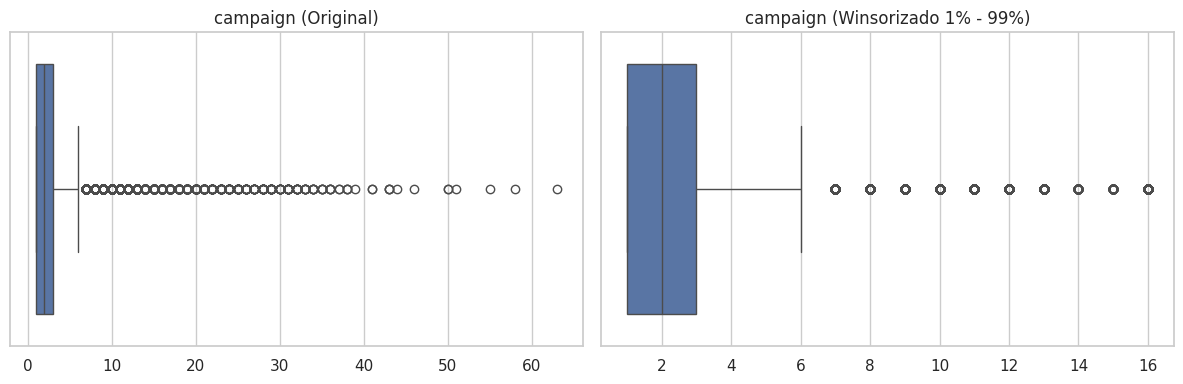

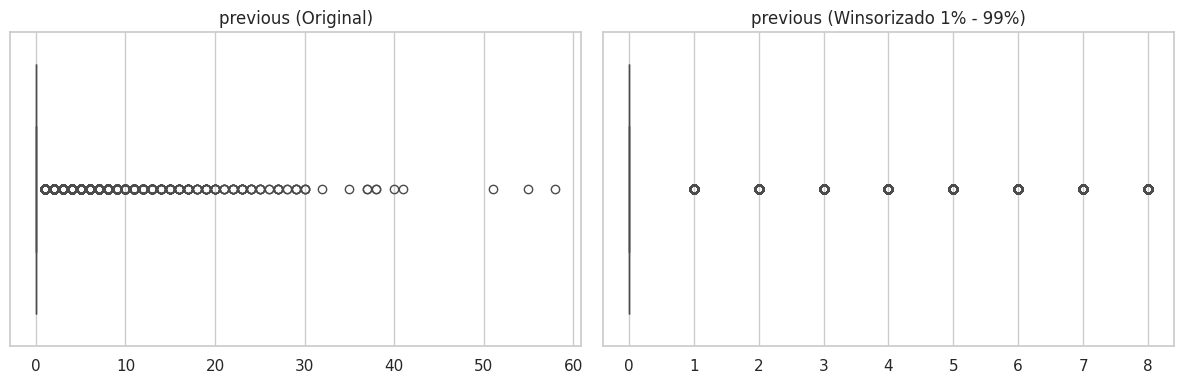

In [ ]:
# Lista de variables que se quieren comparar (original vs winsorizado)
variables_para_comparar = ['campaign', 'previous']

# --- Start of added code ---

# Function to perform winsorization
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    """Applies winsorization to a pandas Series."""
    # Ensure the series is numeric and handle potential NaNs
    series = series.dropna().astype(float)
    if series.empty:
        return pd.Series(np.nan, index=series.index) # Return NaNs if series is empty

    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)

    # Apply winsorization
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)
    return winsorized_series

# Create a new DataFrame to store winsorized data
df_winsor = df.copy() # Start with a copy of the original DataFrame

# Apply winsorization to the specified columns
for col in variables_para_comparar:
    if col in df_winsor.columns: # Check if column exists
        df_winsor[col] = winsorize_series(df_winsor[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# --- End of added code ---

# Iterar sobre cada variable para crear los gráficos de comparación
for col in variables_para_comparar:
    # Check if the column exists in both dataframes before plotting
    if col in df.columns and col in df_winsor.columns:
        # Crear una figura con dos subplots (uno para el original, otro para el winsorizado)
        fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 1 fila, 2 columnas, ajusta el tamaño

        # Gráfico de caja para la variable original
        sns.boxplot(data=df, x=col, ax=axes[0])
        axes[0].set_title(f'{col} (Original)')
        axes[0].set_xlabel('') # Elimina la etiqueta del eje x si es redundante

        # Gráfico de caja para la variable winsorizada
        sns.boxplot(data=df_winsor, x=col, ax=axes[1])
        axes[1].set_title(f'{col} (Winsorizado 1% - 99%)')
        axes[1].set_xlabel('') # Elimina la etiqueta del eje x si es redundante

        # Ajusta automáticamente los subplots para que no se solapen
        plt.tight_layout()

        # Muestra la figura
        plt.show()
    else:
        print(f"Skipping plot for column '{col}' as it's not in both DataFrames.")


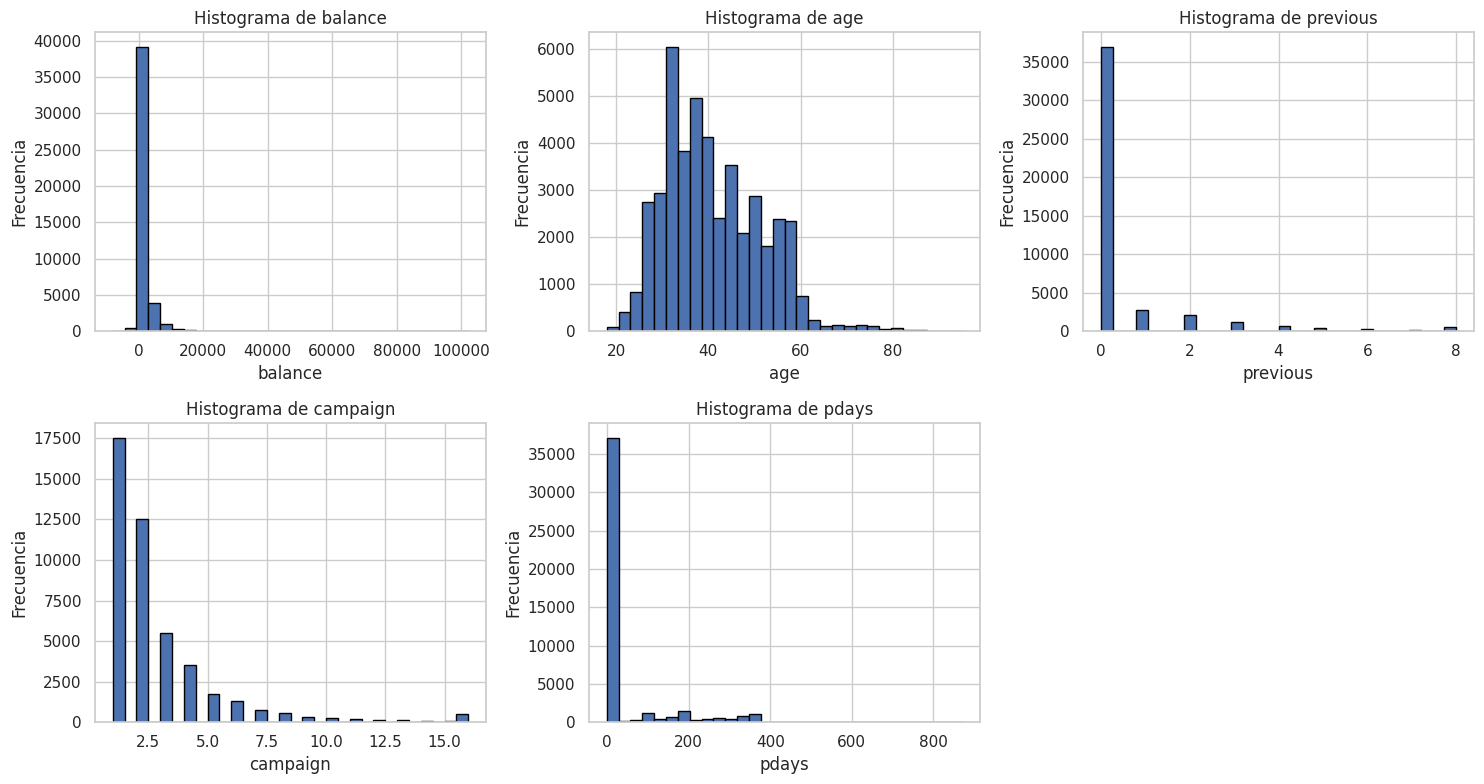

In [ ]:
df['campaign'] = df_winsor['campaign']
df['previous'] = df_winsor['previous']
# List of variables to plot before any log transformation
variables_to_plot_before_transform = ['balance', 'age', 'previous', 'campaign', 'pdays']

# Determine the number of columns and rows for the subplot grid
n_cols = 3
n_rows = math.ceil(len(variables_to_plot_before_transform) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the list of variables and the subplots
for i, var in enumerate(variables_to_plot_before_transform):
    # Check if the variable exists in the DataFrame
    if var in df.columns:
        ax = axes[i]

        # Replace infinite values with NaN before dropping NaNs for plotting
        data_to_plot = df[var].replace([np.inf, -np.inf], np.nan).dropna()

        # Check if there is data to plot after dropping NaNs
        if not data_to_plot.empty:
            ax.hist(data_to_plot, bins=30, edgecolor='black')
            ax.set_title(f'Histograma de {var}')
            ax.set_xlabel(var)
            ax.set_ylabel('Frecuencia')
            ax.grid(True)
        else:
             ax.set_title(f'No data for {var}')
             ax.text(0.5, 0.5, 'No valid data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


# Hide any unused subplots if the number of columns isn't a multiple of n_cols
for i in range(len(variables_to_plot_before_transform), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust subplots to prevent overlapping
plt.show()

In [ ]:
# Use the df DataFrame which contains the transformed columns
df_vf = df[[
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    # 'contact', 'month', 'poutcome', # Remove 'contact' and 'poutcome'
    'month', # Keep 'month' as it was not dropped
    'balance','campaign', 'previous','pdays','y'
]]

#Se categorizo pdays, el -1 por 0.
df_vf['pdays'] = df_vf['pdays'].replace(-1, 0)

df_vf.sample(10)

<ipython-input-109-727a17d967c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vf['pdays'] = df_vf['pdays'].replace(-1, 0)


,age,job,marital,education,default,housing,loan,month,balance,campaign,previous,pdays,y
18239,35,technician,married,secondary,1,1,0,jul,-1322,11.0,0.0,0,0
8157,50,technician,married,secondary,0,1,0,jun,669,1.0,0.0,0,0
9733,53,blue-collar,married,secondary,0,0,0,jun,16,1.0,0.0,0,0
35165,31,blue-collar,married,secondary,0,1,1,may,990,1.0,0.0,0,0
19658,51,retired,married,secondary,0,0,0,aug,0,4.0,0.0,0,0
39563,30,management,single,tertiary,0,0,0,may,938,2.0,1.0,105,0
36476,43,blue-collar,married,primary,0,1,0,may,0,3.0,4.0,285,0
6160,39,blue-collar,married,secondary,0,1,1,may,-131,1.0,0.0,0,0
16874,56,management,married,secondary,0,0,1,jul,353,2.0,0.0,0,0
9599,32,entrepreneur,married,secondary,0,1,0,jun,1328,5.0,0.0,0,0





---


Se identificaron los outliers de las variables numéricas continuas mediante el criterio del rango intercuartílico (IQR). Se visualizaron estos valores con diagramas de caja y se cuantificaron los outliers por variable. A partir de este diagnóstico, se tomaron decisiones diferenciadas: se eliminó un valor extremo en previous (mayor a 250) y se aplicó winsorización entre los percentiles 1% y 99% a las variables campaign y previous, dado su alto sesgo y presencia de valores atípicos que podrían distorsionar el modelo. Finalmente, se descartó la variable duration por representar una fuga de información (data leakage), ya que refleja un resultado posterior al proceso de decisión del cliente. El resto de las variables se conservaron sin imputación, pues sus valores extremos eran coherentes con la naturaleza del fenómeno.


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [ ]:
# Revisar todas las columnas y sus tipos
df_vf.dtypes.to_frame(name="Tipo de dato")

,Tipo de dato
age,int64
job,object
marital,object
education,object
default,int64
housing,int64
loan,int64
month,object
balance,int64
campaign,float64


In [ ]:
# Columnas numéricas (ya transformadas previamente)
numerical_cols = [
    'age','balance',
    'pdays', 'campaign', 'previous'
]

# Columnas categóricas sin orden natural (nominales)
categorical_cols = [
    'job', 'marital', 'default', 'housing',
    'loan'
]

# Columnas categóricas con orden natural (ordinales)
ordinal_cols = ['month', 'education']

# Orden explícito para las columnas ordinales
month_order = [['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
education_order = [['unknown', 'primary', 'secondary', 'tertiary']]

#Variable objetivo
y = df_vf['y']

# X sin 'y'
X = df_vf.drop(columns=['y'])


X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
y_clean = y.loc[X_clean.index]

# Define the numerical pipeline
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Define the categorical pipeline
# handle_unknown='ignore' will create columns of zeros for unknown categories during transform
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ordinal pipeline
ordinal_pipeline = Pipeline([
    # Specify the categories and handle unknown values during transform
    ('ordinal', OrdinalEncoder(categories=month_order + education_order, handle_unknown='use_encoded_value', unknown_value=-1)),
    ('minmax', MinMaxScaler())
])

# Define the preprocessor with corrected remainder handling
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols),
    ('ord', ordinal_pipeline, ordinal_cols)
    # Removed remainder='passthrough' to drop columns not explicitly listed
])


# Apply the preprocessor
# fit_transform should be applied to X_clean, which has no NaNs/Infs
X_processed = preprocessor.fit_transform(X_clean)

print("Shape original:", X.shape)
print("Shape limpio:", X_clean.shape) # Display shape after dropping NaNs
print("Shape procesado:", X_processed.shape)

# Align y_clean with X_clean by using the index of X_clean
y_clean = y.loc[X_clean.index]

# Get the feature names out from the preprocessor
# This method correctly combines names from all transformers
final_column_names = preprocessor.get_feature_names_out()

# Create the processed DataFrame
X_processed_df = pd.DataFrame(X_processed, index=X_clean.index, columns=final_column_names)

# Visualizar
X_processed_df.head(20)


Shape original: (45210, 12)
Shape limpio: (45210, 12)
Shape procesado: (45210, 27)


,num__age,num__balance,num__pdays,num__campaign,num__previous,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,...,cat__marital_married,cat__marital_single,cat__default_0,cat__default_1,cat__housing_0,cat__housing_1,cat__loan_0,cat__loan_1,ord__month,ord__education
0,1.606945,0.256411,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,1.0
1,0.288524,-0.437896,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5
2,-0.747378,-0.446764,-0.410978,-0.654133,-0.366264,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.363636,0.5
3,0.571043,0.047199,-0.410978,-0.654133,-0.366264,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5
4,-0.747378,-0.447092,-0.410978,-0.654133,-0.366264,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.363636,0.5
5,-0.559032,-0.371553,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,1.0
6,-1.218243,-0.300611,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.363636,1.0
7,0.100178,-0.446764,-0.410978,-0.654133,-0.366264,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.363636,1.0
8,1.606945,-0.407680,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.0
9,0.194351,-0.252660,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5


In [ ]:
#Cuantas columnas nuevas hay?
original_cols_count = X_clean.shape[1]
processed_cols_count = X_processed.shape[1]
original_relevant_cols_count = len(numerical_cols) + len(categorical_cols) + len(ordinal_cols)
nuevas_columnas = processed_cols_count - X_clean.shape[1]

print("Nuevas columnas generadas (net change):", nuevas_columnas)

Nuevas columnas generadas (net change): 15


## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [ ]:
from sklearn.model_selection import train_test_split


# Ensure X_processed_df and y have the same index/number of samples
# The previous cleaning steps (dropna) were applied to X, creating X_clean
# X_processed_df was created from X_clean, so its index corresponds to the cleaned X
# We need to filter y based on the index of X_processed_df
y_clean = y.loc[X_processed_df.index]

# División con estratificación y semilla 123
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, test_size=0.2, random_state=123, stratify=y_clean # Use y_clean here
)

# Mostrar tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)

Tamaño de X_train: (36168, 27)
Tamaño de X_test : (9042, 27)
Tamaño de y_train: (36168,)
Tamaño de y_test : (9042,)


In [ ]:
print("Distribución en y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en y_test:")
print(y_test.value_counts(normalize=True))

Distribución en y_train:
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Distribución en y_test:
y
0    0.88299
1    0.11701
Name: proportion, dtype: float64


No esta balanceado pero esta respetando las proporciones

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score

# Entrenar modelo sin restricciones (no regularizado)
tree_clf = DecisionTreeClassifier(random_state=123)
tree_clf.fit(X_train, y_train)

# Predicción en prueba
y_test_pred = tree_clf.predict(X_test)

# F1 Score en test
# Change pos_label='yes' to pos_label=1
f1_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score (prueba): {f1_test:.4f}")

F1 Score (prueba): 0.2455


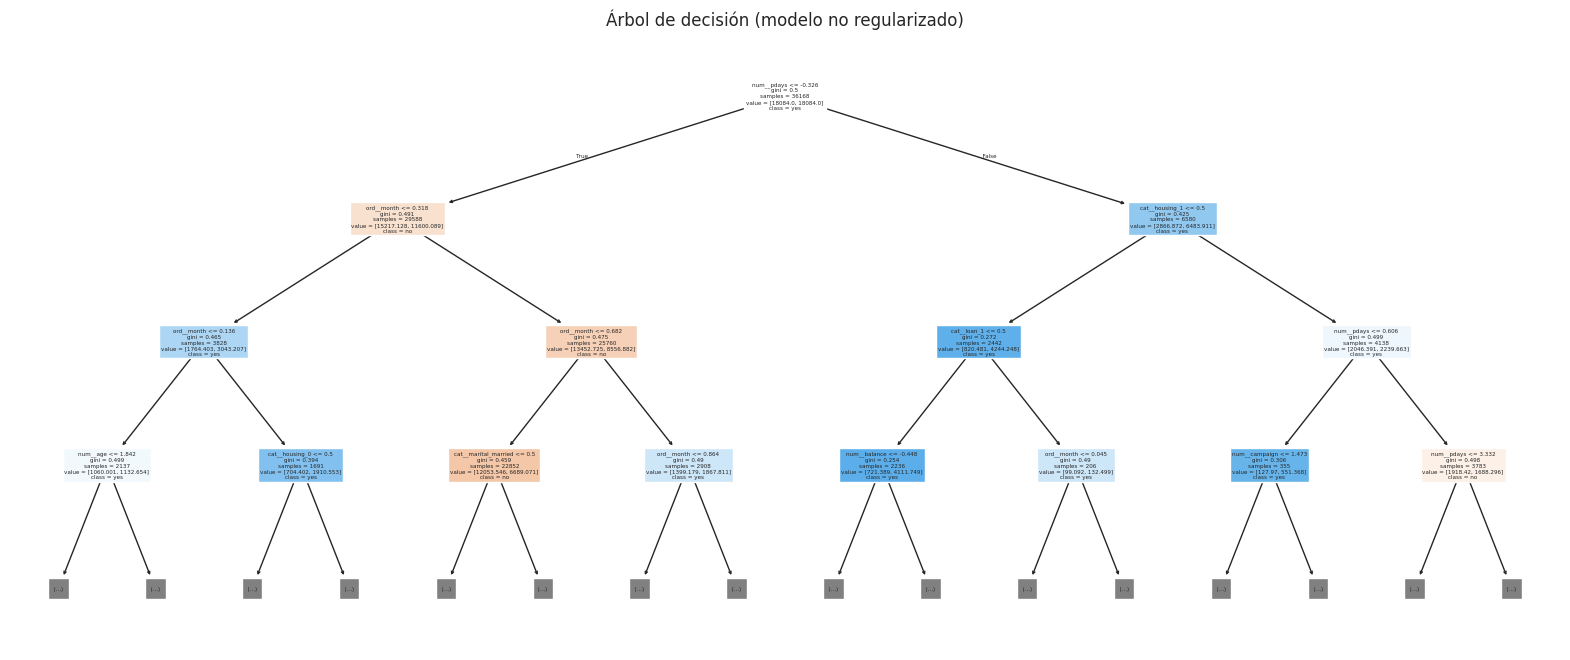

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score

# Initialize the Decision Tree Classifier with class_weight='balanced'
# This new instance replaces the previous 'tree_clf'
tree_clf = DecisionTreeClassifier(random_state=123, class_weight='balanced')

# Fit the model to the training data
tree_clf.fit(X_train, y_train) # <--- Add this line

# Plot the fitted tree
plt.figure(figsize=(20, 8))
plot_tree(tree_clf,
          feature_names=X_train.columns,
          class_names=['no', 'yes'],
          filled=True,
          max_depth=3)  # Puedes limitar la profundidad del gráfico solo para visualización
plt.title("Árbol de decisión (modelo no regularizado)")
plt.show()




---


Se entrenó con la clase DecisionTreeClassifier utilizando una división previa entre entrenamiento y prueba, y se aplicó class_weight='balanced' para lidiar con el fuerte desbalance entre clases. Luego se evaluó el desempeño del árbol sobre el conjunto de prueba, obteniéndose un F1 Score de 0.2455, valor que evidencia un rendimiento pobre, probablemente debido al sobreajuste y la dificultad del modelo para generalizar correctamente hacia nuevos datos.

Finalmente, se graficó una versión resumida del árbol entrenado (limitando la profundidad del gráfico a 3 niveles para facilitar la visualización), lo que permitió observar su estructura lógica de decisión inicial basada en variables como month_aug y duration. Esta visualización refleja la complejidad y posible falta de generalización del modelo, típicamente asociada a árboles no podados.


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [ ]:
from sklearn.metrics import f1_score

y_test_pred = tree_clf.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score (prueba): {f1_test:.4f}")

F1 Score (prueba): 0.2505





---


En este paso se evaluó el desempeño del árbol de decisión no regularizado mediante la métrica F1 Score, utilizando el conjunto de prueba. Esta métrica es especialmente adecuada para contextos con clases desbalanceadas —como en este caso, donde la mayoría de los clientes no realizan depósitos—, ya que penaliza tanto los falsos positivos como los falsos negativos.

El modelo obtuvo un F1 Score de 0.2505, lo que indica un bajo desempeño en la capacidad del modelo para identificar correctamente a los clientes que efectivamente realizarán un depósito (la clase positiva minoritaria). Este resultado sugiere que, a pesar de la alta precisión general que podría mostrar una métrica como el accuracy, el modelo no es efectivo para el objetivo principal del negocio, que es detectar con precisión los clientes de interés para la campaña de marketing.

En conclusión, este bajo F1 Score confirma que el árbol sin restricciones tiende a sobreajustar los datos de entrenamiento y no generaliza bien en contextos con clases desbalanceadas. Se hace evidente la necesidad de regularización u otros enfoques más robustos para este tipo de problema.


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score


# Entrenar árbol con profundidad máxima limitada (modelo levemente regularizado)
tree_reg = DecisionTreeClassifier(max_depth=16, random_state=123)
tree_reg.fit(X_train, y_train)

# Predicción en prueba
y_test_pred_reg = tree_reg.predict(X_test)

# F1 Score en prueba
# Change pos_label='yes' to pos_label=1
f1_test_reg = f1_score(y_test, y_test_pred_reg, pos_label=1)
print(f"F1 Score (modelo regularizado): {f1_test_reg:.4f}")

F1 Score (modelo regularizado): 0.2819


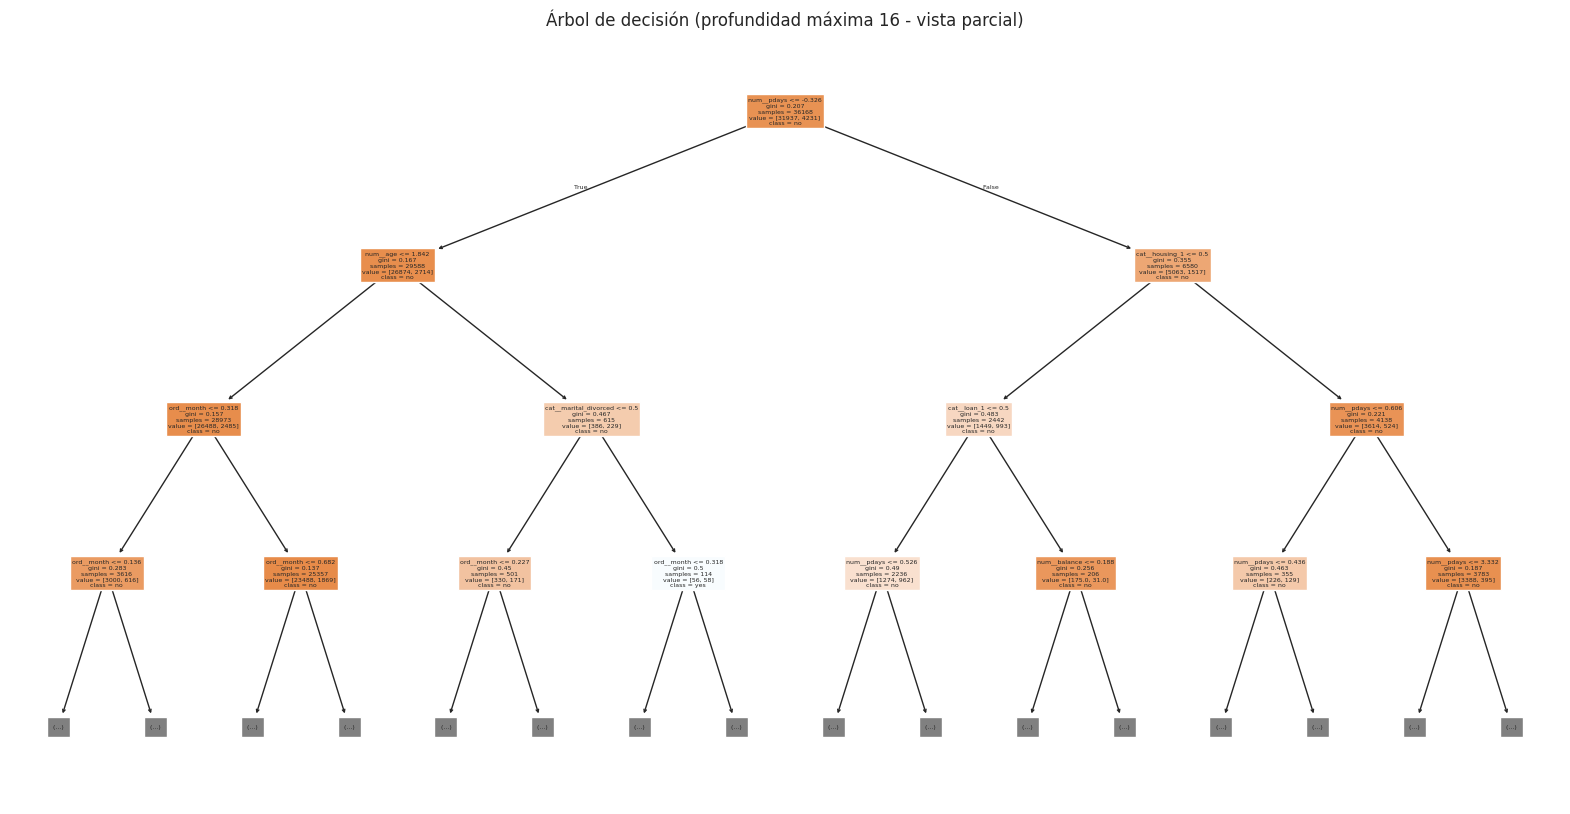

In [ ]:
# Graficar solo primeras ramas (max_depth para visualización, no del modelo)
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['no', 'yes'])
plt.title("Árbol de decisión (profundidad máxima 16 - vista parcial)")
plt.show()




---


El modelo no regularizado, representado por un árbol de decisión sin restricción de profundidad, muestra señales claras de sobreajuste (overfitting), aun cuando el rendimiento se evalúa exclusivamente sobre el conjunto de prueba. El F1 Score obtenido fue de 0.2455, un valor relativamente bajo considerando el objetivo del modelo: identificar correctamente a los clientes que efectivamente harán un depósito, clase que representa una minoría en este problema de clasificación.

El hecho de que este modelo tenga libertad total para crecer en profundidad le permite generar particiones muy específicas, lo cual lo hace altamente sensible al ruido o a fluctuaciones poco representativas del patrón general de los datos. Como resultado, aunque podría obtener un alto desempeño sobre el conjunto de entrenamiento (no mostrado aquí), su capacidad de generalización hacia nuevos datos es limitada, lo cual se refleja en el bajo desempeño sobre el conjunto de prueba.

En contextos con clases desbalanceadas, como es el caso en este conjunto de datos (donde la mayoría de los clientes no suscriben depósitos), el F1 Score es una métrica más informativa que el accuracy, ya que captura el balance entre precisión y recall para la clase minoritaria. Un valor de 0.2455 indica que el modelo no logra predecir adecuadamente los casos positivos (clientes que sí harán depósitos), lo que resulta problemático desde el punto de vista de una estrategia de marketing eficaz.

Finalmente, el gráfico del árbol confirma visualmente esta sobreespecialización, con una estructura compleja y ramificada, lo cual es coherente con un modelo que memoriza más que generaliza. Esto refuerza la necesidad de aplicar regularización, ya sea limitando la profundidad del árbol u optimizando otros hiperparámetros, para obtener un desempeño más robusto y fiable en datos no vistos.


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score

# Entrenar árbol con profundidad máxima 8 (modelo regularizado)
tree_reg2 = DecisionTreeClassifier(max_depth=8, random_state=123)
tree_reg2.fit(X_train, y_train)

# Predicción en entrenamiento
y_test_pred_reg2 = tree_reg2.predict(X_test)

# F1 Score en entrenamiento
# Change pos_label='yes' to pos_label=1
f1_test_reg2 = f1_score(y_test, y_test_pred_reg2, pos_label=1)
print(f"F1 Score (prueba, árbol profundidad 8): {f1_test_reg2:.4f}")

F1 Score (prueba, árbol profundidad 8): 0.2587


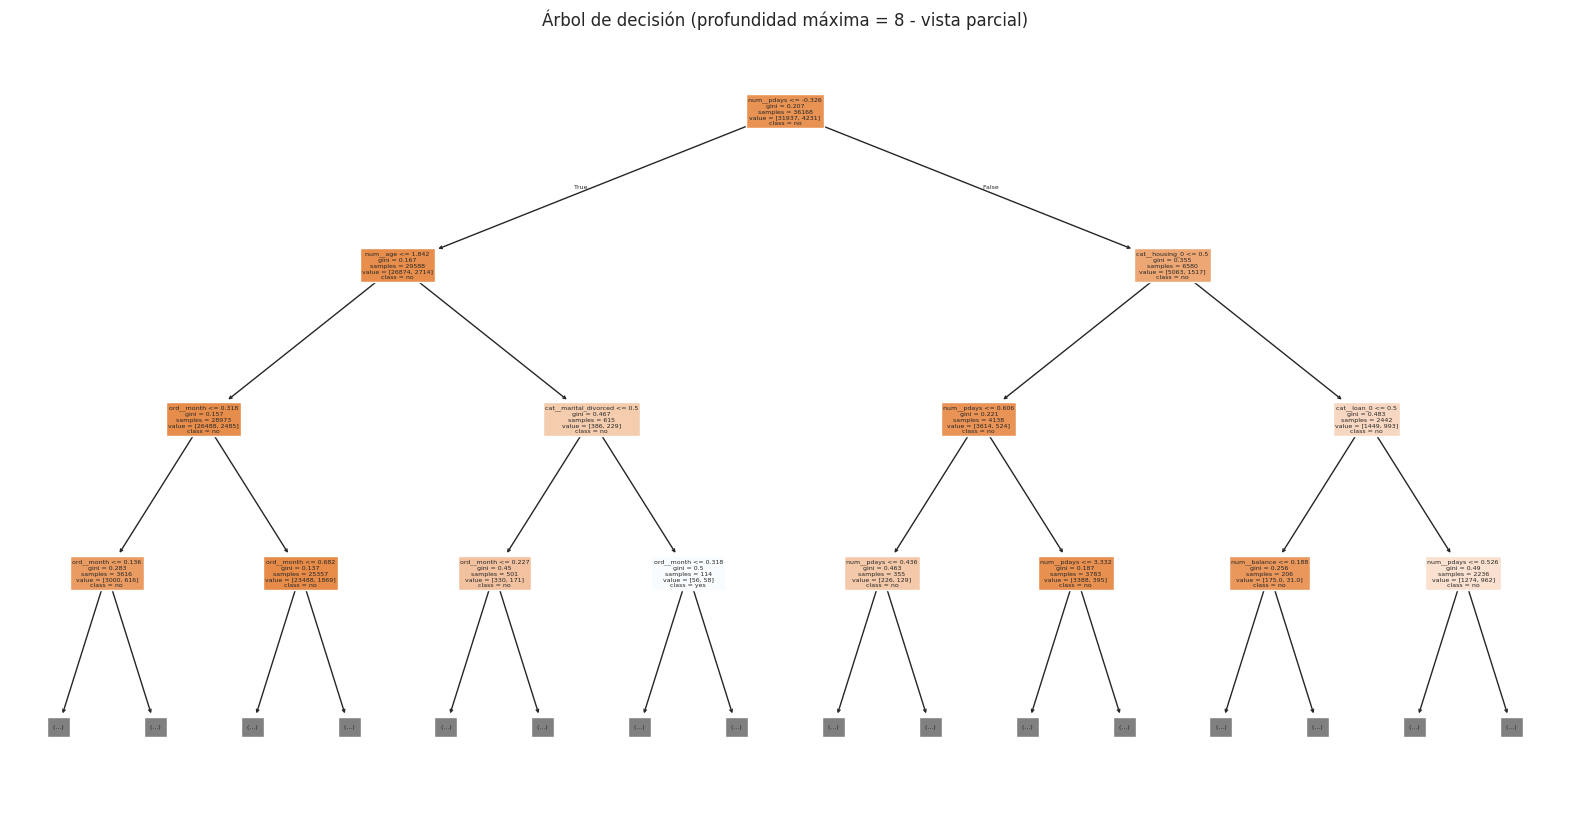

In [ ]:
# Graficar árbol (truncado en visualización, no en entrenamiento)
plt.figure(figsize=(20, 10))
plot_tree(tree_reg2, max_depth=3, filled=True,
          feature_names=X_train.columns, class_names=['no', 'yes'])
plt.title("Árbol de decisión (profundidad máxima = 8 - vista parcial)")
plt.show()




---


Este modelo, un árbol de decisión con una profundidad máxima de 8, corresponde a una versión regularizada del clasificador de decisión, lo que implica que se ha limitado su complejidad para evitar sobreajuste. En comparación con el árbol no regularizado y el modelo levemente regularizado (profundidad 16), este modelo logra un F1 Score de 0.2587 en el conjunto de prueba, que resulta ser el más alto entre los tres árboles entrenados.

Este resultado sugiere que el modelo con profundidad 8 logra el mejor balance entre precisión y recall al momento de identificar la clase minoritaria (clientes que efectivamente harán un depósito). Esto es especialmente relevante en contextos con clases desbalanceadas, como en este caso, donde la clase positiva ('1') representa una fracción reducida de la muestra. Un F1 Score más alto indica que el modelo está capturando mejor a los verdaderos positivos sin incurrir en tantos falsos positivos o negativos como en los otros modelos.

Visualmente, el árbol presenta una estructura más compacta y generalizable que el de profundidad 16, lo que también favorece su interpretabilidad. Al limitar su capacidad de ramificación, el modelo evita memorizar ruido o patrones específicos del conjunto de entrenamiento, lo que suele redundar en un mejor rendimiento fuera de muestra.

En resumen, este modelo logra un rendimiento superior en el conjunto de prueba al evitar tanto el sobreajuste como el subajuste, lo que refuerza el valor de aplicar regularización adecuada en árboles de decisión en presencia de desbalance de clases y gran cantidad de variables predictoras.

---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

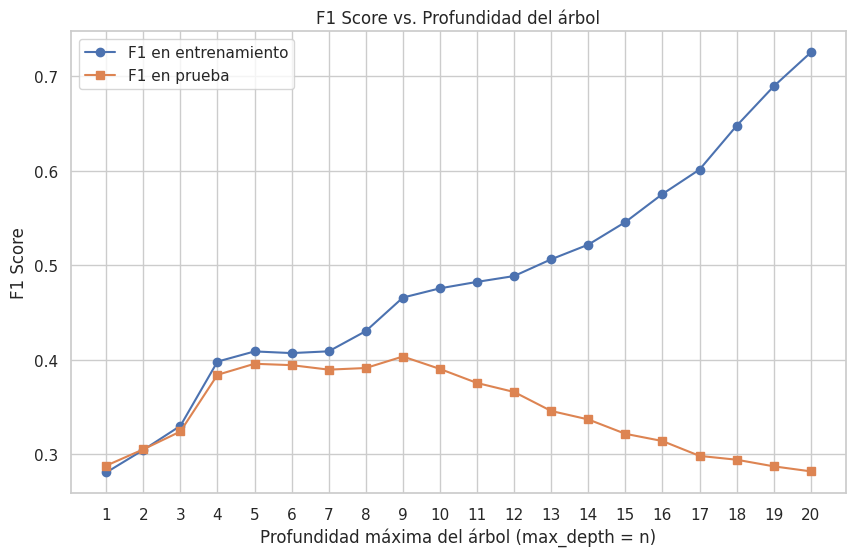

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Guardar resultados
depths = list(range(1, 21))
f1_train_scores = []
f1_test_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=123, class_weight='balanced')
    tree.fit(X_train, y_train)

    # F1 en entrenamiento
    y_train_pred = tree.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, pos_label=1)
    f1_train_scores.append(f1_train)

    # F1 en prueba
    y_test_pred = tree.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred, pos_label=1)
    f1_test_scores.append(f1_test)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(depths, f1_train_scores, label='F1 en entrenamiento', marker='o')
plt.plot(depths, f1_test_scores, label='F1 en prueba', marker='s')
plt.xlabel('Profundidad máxima del árbol (max_depth = n)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Profundidad del árbol')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()




---


Primero, observamos que el F1 Score en entrenamiento aumenta de forma continua y prácticamente monótona al incrementar la profundidad. Esto es esperable, ya que un árbol más profundo tiene mayor capacidad de ajustarse a los datos de entrenamiento, incluyendo sus patrones específicos e incluso el ruido. En el extremo, cuando max_depth = 20, el árbol logra un F1 Score cercano a 0.73, lo que sugiere que el modelo se ajusta casi perfectamente a los datos de entrenamiento.

Sin embargo, el F1 Score en la muestra de prueba —la métrica relevante para evaluar la capacidad de generalización del modelo— muestra un patrón distinto: crece hasta aproximadamente max_depth = 9, donde alcanza su valor máximo cercano a 0.40, y luego comienza a decrecer. Este comportamiento es un signo claro de overfitting: a partir de cierto punto, el modelo aprende detalles demasiado específicos del conjunto de entrenamiento que no se replican en los datos nuevos. Así, pierde capacidad para generalizar a observaciones no vistas, lo que se refleja en la caída del F1 Score en test.

Por tanto, el valor de max_depth que maximiza el rendimiento en test es aproximadamente 9, el cual representa un compromiso adecuado entre flexibilidad y generalización. Este valor puede considerarse el parámetro óptimo n* del modelo de árbol bajo este criterio.

Finalmente, esta evidencia empírica confirma la importancia de regularizar la profundidad del árbol en contextos con riesgo de sobreajuste, especialmente en problemas con clases desbalanceadas y ruido en los datos. Un modelo no regularizado (muy profundo) puede ser seductor por su alto rendimiento en entrenamiento, pero no necesariamente es útil para tomar decisiones reales.

---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score


# Suponiendo que tienes ya: X_processed_df (features) y y (target original)

# Sincronizamos y con los índices válidos (por limpieza previa)
y_clean = y.loc[X_processed_df.index]

# División con stratify y semilla
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, test_size=0.2, random_state=123, stratify=y_clean
)

# Hiperparámetros propuestos
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

# Clasificador con penalización por clases desbalanceadas
rf = RandomForestClassifier(random_state=123, class_weight='balanced')

# Grid Search con validación cruzada y F1 como métrica
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluación con el mejor modelo
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
# Change pos_label='yes' to pos_label=1
f1_test = f1_score(y_test, y_test_pred, pos_label=1)

# Reporte
print(" Mejor combinación de hiperparámetros:", grid_search.best_params_)
print(f" F1 Score en test: {f1_test:.4f}")
print(" Positivos reales (yes):", (y_test == 1).sum()) # Also update the check for real positives
print(" Positivos predichos (yes):", (y_test_pred == 1).sum()) # Also update the check for predicted positives

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 Mejor combinación de hiperparámetros: {'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
 F1 Score en test: 0.4387
 Positivos reales (yes): 1058
 Positivos predichos (yes): 1162


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [ ]:
# Paso 1: Imports
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score



# Paso 2: Asegurar coherencia entre X e y
y_clean = y.loc[X_processed_df.index]

# Paso 3: División entrenamiento y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, test_size=0.2, random_state=123, stratify=y_clean
)

# Paso 4: Calcular peso para manejar desbalance de clases
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Paso 5: Definir el modelo base
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_weight,  # esto maneja el desbalance
    random_state=123
)

# Paso 6: Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

# Paso 7: Configurar búsqueda con GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Paso 8: Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Paso 9: Evaluar el mejor modelo en test
best_xgb = grid_search.best_estimator_
y_pred_test = best_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred_test, pos_label=1)

print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
print(f"F1 Score en test: {f1:.4f}")
print("Positivos reales (1):", (y_test == 1).sum())
print("Positivos predichos (1):", (y_pred_test == 1).sum())

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejor combinación de hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 100}
F1 Score en test: 0.4094
Positivos reales (1): 1058
Positivos predichos (1): 1995


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicción en test
y_test_pred = nb_model.predict(X_test)
f1_nb_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score en test (Naive Bayes): {f1_nb_test:.4f}")

F1 Score en test (Naive Bayes): 0.3138




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from IPython.display import display

modelos = {
    "Árbol no regularizado": tree_clf,
    "Árbol max_depth=16": tree_reg,
    "Árbol max_depth=8": tree_reg2,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Naive Bayes": nb_model
}

resultados = []

for nombre, modelo in modelos.items():

    y_pred = modelo.predict(X_test)

    f1 = f1_score(y_test, y_pred, pos_label=1)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)

    resultados.append({
        "Modelo": nombre,
        "F1 Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

df_resultados = pd.DataFrame(resultados)

df_resultados = df_resultados.sort_values(by="F1 Score", ascending=False)

print("Tabla resumen de métricas de rendimiento en el conjunto de prueba:")
display(df_resultados)

Tabla resumen de métricas de rendimiento en el conjunto de prueba:


,Modelo,F1 Score,Accuracy,Precision,Recall
3,Random Forest,0.438739,0.862199,0.419105,0.460302
4,XGBoost,0.409433,0.800597,0.313283,0.590737
5,Naive Bayes,0.313833,0.779474,0.246753,0.431002
1,Árbol max_depth=16,0.281896,0.869277,0.394558,0.219282
2,Árbol max_depth=8,0.258693,0.882106,0.489474,0.175803
0,Árbol no regularizado,0.250478,0.826587,0.253385,0.247637





---


El conjunto de datos presenta un desbalance significativo en la variable objetivo: la mayoría de los individuos no suscriben el depósito (clase 0), mientras que una proporción minoritaria sí lo hace (clase 1). Esta situación exige el uso de métricas sensibles al balance de clases, como el F1 Score, que pondera tanto la precisión como el recall, penalizando los modelos que sesgan hacia la clase mayoritaria.

En este contexto, el modelo que obtuvo el mayor F1 Score fue Random Forest (0.4387), seguido de XGBoost (0.4094). Estos modelos también exhibieron valores razonables de precisión y recall, con XGBoost destacándose por su mayor capacidad de recuperación de positivos (Recall = 0.5907), lo cual es particularmente relevante en contextos como campañas de marketing, donde omitir a un potencial cliente (falso negativo) implica una pérdida de oportunidad.


Por el contrario, los modelos de árbol de decisión menos profundos (max_depth=8 o 16) y el árbol no regularizado presentaron un rendimiento inferior en F1 Score, indicando que la falta de regularización o una profundidad subóptima no permitió capturar adecuadamente la estructura de los datos. Específicamente, el árbol no regularizado mostró un F1 Score de apenas 0.2505, revelando un sobreajuste severo: el modelo memoriza el entrenamiento, pero falla en generalizar al conjunto de prueba.

El modelo Naive Bayes, aunque simple, logró un F1 Score intermedio (0.3138), demostrando una relativa capacidad de generalización pese a su supuesto de independencia condicional entre variables. Sin embargo, su baja precisión (0.2467) indica una elevada proporción de falsos positivos, lo que podría implicar un costo económico no deseado en un entorno de marketing.

En conclusión, Random Forest fue el modelo que logró el mejor compromiso entre presición y recall, y por ende, el mejor F1 score global, destacándose como el modelo más robusto frente al desbalance.

Por otro lado, XGBoost mostro un mejor recall, lo que sugiere que es particularmente útil si se prioriza evitar falsos negativos, es decir, si el objetivo es no perder clientes potenciales.

Los modelos de árbol poco nada regularizados tuvieron un rendimiento limitado, confirmando que una profundidad excesiva induce overfitting, mientras que una profundidad demasiado restringida conlleva underfitting.

Finalmente, Naive Bayes, supera F1 Scoore a los árboles no óptimos, siendo un buen punto de partida en escenarios con fuerte desbalance, aunque menos competitivos frente a Random Forest o XGBoost.

---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.




---


*Escriba* su respuesta en esta celda...


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---